In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

# 1 Testing a projectile simulation

## 1.1 Building a simulation with Euler’s method

In [3]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [4]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    plt.ylabel('Height',fontsize=16)
    plt.xlabel('Distance',fontsize=16)
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

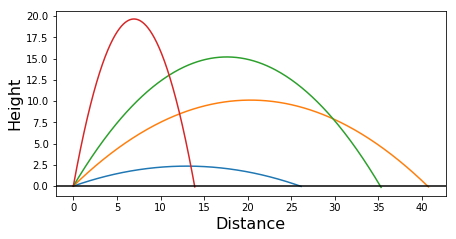

In [5]:
plot_trajectories(
    trajectory(20), 
    trajectory(45),
    trajectory(60),
    trajectory(80))
plt.savefig('12.01.svg')

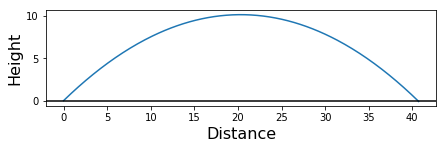

In [6]:
plot_trajectories( 
    trajectory(45))
plt.savefig('12.02.svg')
plt.savefig('12.07.svg')

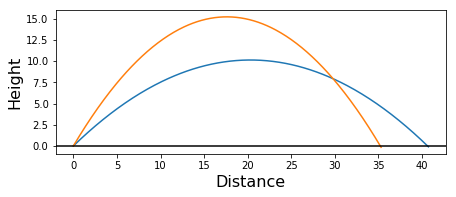

In [7]:
plot_trajectories( 
    trajectory(45),
    trajectory(60))
plt.savefig('12.06.svg')

## 1.2 Measuring properties of the trajectory

In [8]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1] #<1>

def max_height(traj):
    return max(traj[2])

## 1.3 Exploring different launch angles

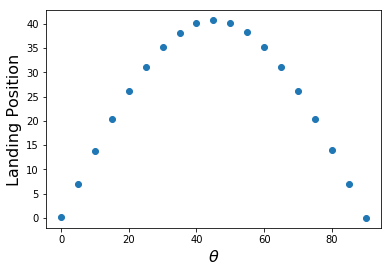

In [9]:
angles = range(0,95,5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)
plt.ylabel('Landing Position',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)
plt.savefig('12.03.svg')
plt.savefig('12.08.svg')

## 1.4 Exercises

**Exercise:** How far does the cannonball go when fired at an angle of 50 degrees from an initial height of zero?  How about if it is fired at an angle of 130 degrees?

In [10]:
landing_position(trajectory(50))

40.10994684444007

In [11]:
landing_position(trajectory(130))

-40.10994684444007

**Mini-project:** Enhance the `plot_trajectories` function in the source code to draw a large dot on the trajectory graph at each passing second, so we can see the passing of time on the plot.

See implementation above

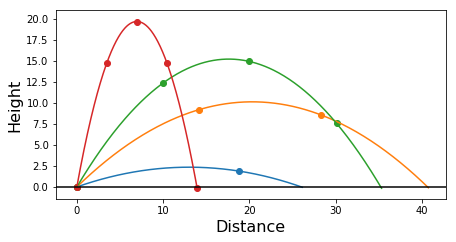

In [12]:
plot_trajectories(
    trajectory(20), 
    trajectory(45),
    trajectory(60),
    trajectory(80), 
    show_seconds=True)
plt.savefig('MINI_PROJECT_12.02.svg')

**Exercise:** Make a scatterplot of hang time versus angle, for angles between 0 and 180 degrees.  What launch angle produces the maximum hang time?

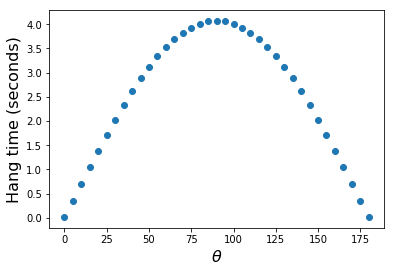

In [13]:
test_angles = range(0,181,5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)
plt.ylabel('Hang time (seconds)',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)
plt.savefig('EXERCISE_12.03.svg')

**Mini-project:** Write a function `plot_trajectory_metric` which plots the result of any metric we want over a given set of theta values.  For instance `plot_trajectory_metric(landing_position,[10,20,30])` should make a scatter plot of landing positions versus launch angle for launch angles of 10, 20, and 30 degrees.  

As a bonus, pass the keyword arguments from `plot_trajectory_metric` to the internal calls of the trajectory function, so you could re-run the test with a different simulation parameter. For instance, `plot_trajectory_metric(landing_position,[10,20,30], height=10)` would make the same plot, but simulated with a 10 meter initial launch height.

In [14]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,[metric(trajectory(theta,**settings)) for theta in thetas])

Text(0.5,0,'$\\theta$')

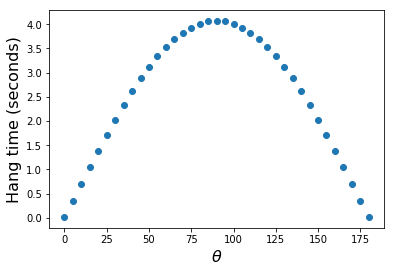

In [15]:
plot_trajectory_metric(hang_time, range(0,181,5))
plt.ylabel('Hang time (seconds)',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)

**Mini-project:** What is the approximate launch angle that yields the greatest range for the cannonball with a 10 meter initial launch height?

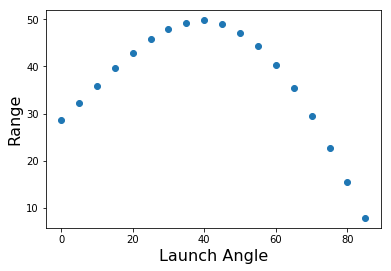

In [16]:
plot_trajectory_metric(landing_position,range(0,90,5), height=10)
plt.ylabel('Range',fontsize=16)
plt.xlabel('Launch Angle',fontsize=16)
plt.savefig('MINI_PROJECT_12.05.svg')

# 2 Calculating the optimal range

## 2.1 Finding the projectile range as a function of the launch angle

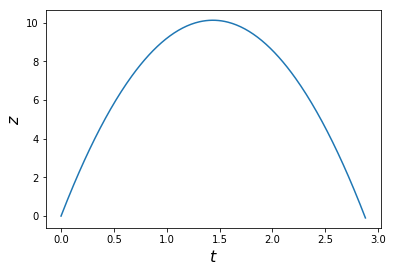

In [17]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.ylabel('$z$',fontsize=16)
plt.xlabel('$t$',fontsize=16)
plt.plot(ts,zs)
plt.savefig('12.09.svg')

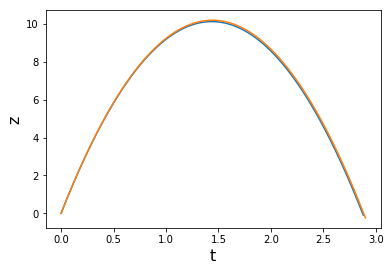

In [18]:
def z(t): #<1>
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

plt.plot(ts,zs)
plot_function(z,0,2.9)
plt.ylabel('z',fontsize=16)
plt.xlabel('t',fontsize=16)
plt.savefig('12.10.svg')

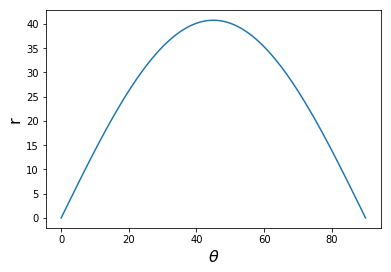

In [19]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)
plt.ylabel('r',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)
plt.savefig('12.12.svg')

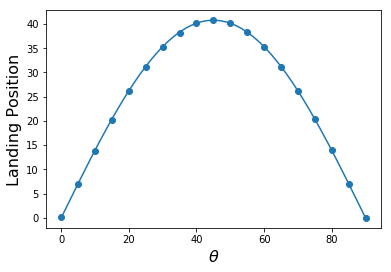

In [20]:
plot_trajectory_metric(landing_position,range(0,95,5))
plot_function(lambda theta:(-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180),0,90)
plt.ylabel('Landing Position',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)
plt.savefig('12.11.svg')

## 2.2 Solving for the maximum range

In [21]:
r(45)

40.774719673802245

In [22]:
r(135)

-40.77471967380224

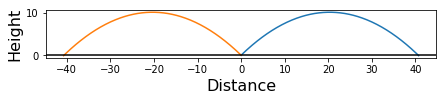

In [23]:
plot_trajectories(
    trajectory(45),
    trajectory(135))
plt.savefig('12.13.svg')

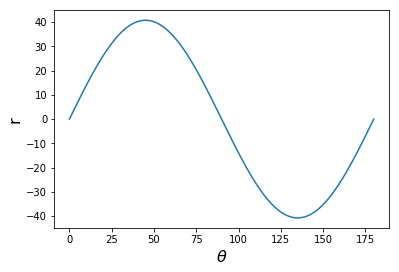

In [24]:
plot_function(r,0,180)
plt.ylabel('r',fontsize=16)
plt.xlabel('$\\theta$',fontsize=16)
plt.savefig('12.14.svg')

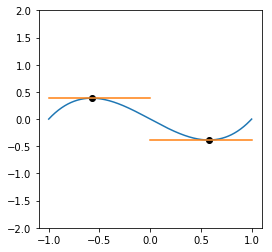

In [25]:
from math import sqrt,sin,cos,pi

plot_function(lambda x: x**3 - x, -1, 1)
def asdf(x):
    return x**3-x
plt.gcf().set_size_inches(4,4)
plt.plot([-1,0],[asdf(-sqrt(1/3)),asdf(-sqrt(1/3))],c='C1')
plt.plot([0,1],[asdf(sqrt(1/3)),asdf(sqrt(1/3))],c='C1')
plt.scatter([-sqrt(1/3)],[asdf(-sqrt(1/3))],c='k')
plt.scatter([sqrt(1/3)],[asdf(sqrt(1/3))],c='k')
plt.ylim(-2,2)
plt.savefig('12.15a.svg')

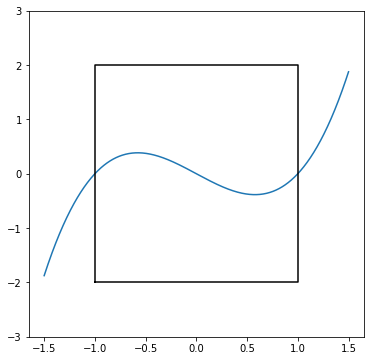

In [26]:
plot_function(lambda x: x**3 - x, -1.5, 1.5)
plt.gcf().set_size_inches(6,6)
plt.plot([-1,1,1,-1,-1],[-2,-2,2,2,-2],c='k')
plt.ylim(-3,3)
plt.savefig('12.15b.svg')

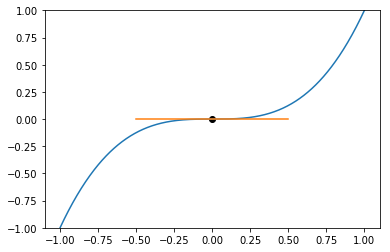

In [27]:
plot_function(lambda x: x**3, -1,1)
# plt.gcf().set_size_inches(6,6)
plt.plot([-0.5,0.5],[0,0],c='C1')
plt.scatter([0],[0],c='k')
plt.ylim(-1,1)
plt.savefig('12.16.svg')

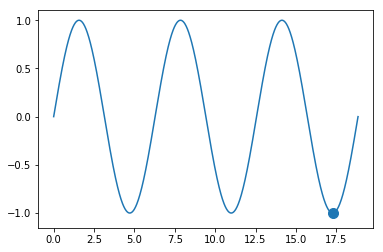

In [28]:
plot_function(sin,0,6*pi)
plt.scatter([11*pi/2],[-1],s=100)
plt.savefig('EXERCISE_12.7.svg')

## 2.3 Identifying maxima and minima

# 3 Enhancing our simulation

## 3.1 Adding another dimension

In [29]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [30]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.
C:\Users\Paul\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


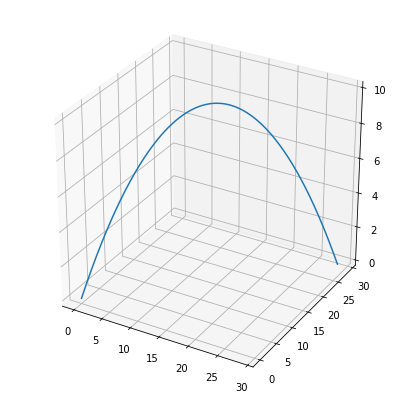

In [31]:
plot_trajectory3d(trajectory3d(45,45))

## 3.2 Modeling terrain around the cannon

In [32]:
def flat_ground(x,y):
    return 0

In [33]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [34]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [35]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

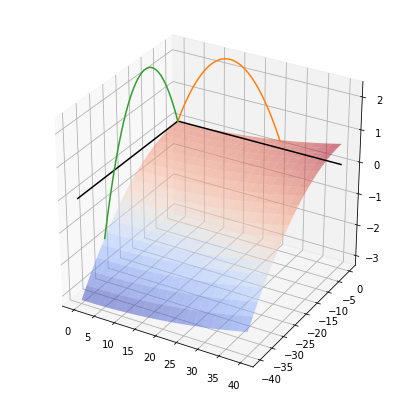

In [36]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

## 3.3 Solving for the range of the projectile in 3D

In [37]:
from math import sqrt

B = 0.001 #<1>
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): #<2>
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi): #<3>
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) #<4>
    a = (g/2) - B * vx**2 + C * vy**2 #<5>
    b = vz
    landing_time = -b/a #<6>
    landing_distance = v_xy * landing_time #<7>
    return landing_distance

## 3.4 Exercises

**Mini-project:** When an object like a cannonball moves quickly through the air, it experiences frictional force from the air, called drag, which pushes it in the opposite direction it’s moving.  The drag force depends on a lot of factors, including the size and shape of the cannonball and the density of the air, but for simplicity, let’s assume it works as follows.  If $\vec{v}$ is the cannonball’s velocity vector at any point, the drag force $\vec{F}_d$ will be:

$$\vec{F}_d = -\alpha \vec{v}$$

where $\alpha$  (the greek letter “alpha”) is a number giving the magnitude of drag felt by a particular object in particular air.  The fact that the drag force is proportional to the velocity means that as an object speeds up, it feels more and more drag.  

As a mini-project, figure out how to add a drag parameter to the cannonball simulation, and show that drag causes the cannonball to slow down.


In [38]:
def trajectory3d_drag(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground,drag=0):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vx -= (drag * vx) * dt
        vy -= (drag * vy) * dt
        vz += (g - (drag * vz)) * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

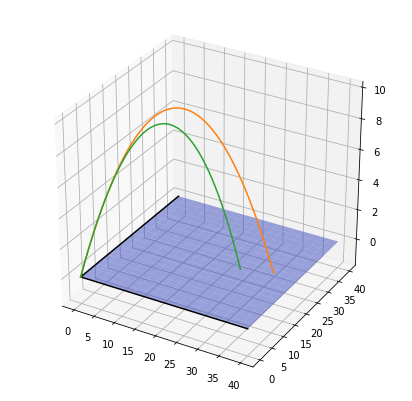

In [39]:
plot_trajectories_3d(
    trajectory3d_drag(45,45,elevation=ridge),
    trajectory3d_drag(45,45,elevation=ridge,drag=0.1),
    bounds=[0,40,0,40],
#     elevation=flat
)
plt.savefig('MINI_PROJECT_12.12.svg')

# 4 Optimizing range using gradient ascent

## 4.1 Plotting range versus launch parameters

In [40]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 504x504 with 0 Axes>

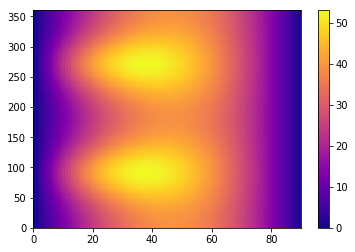

In [41]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.savefig('12.21.svg')
plt.savefig('12.21.png')
plt.savefig('12.22.svg')
plt.savefig('12.22.png')

## 4.2 The gradient of the range function

In [42]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

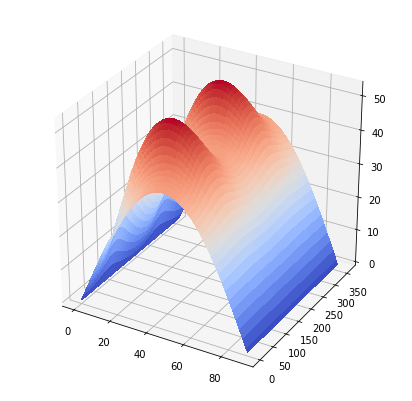

In [43]:
plot_scalar_field(landing_distance,0,90,0,360)
# plt.savefig('12.23.svg')
# plt.savefig('12.23.png')
plt.savefig('12.24.svg')
plt.savefig('12.24.png')

## 4.3 Finding the uphill direction with the gradient

In [44]:
def secant_slope(f,xmin,xmax): #<1>
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6): #<2>
    return secant_slope(f,x-dx,x+dx)

In [45]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y), y0, dx=dx)
    return (partial_x,partial_y)

In [46]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

Feel free to ignore the following code, which just supports the graphic of overlaying a vector field on a heatmap.

<Figure size 504x504 with 0 Axes>

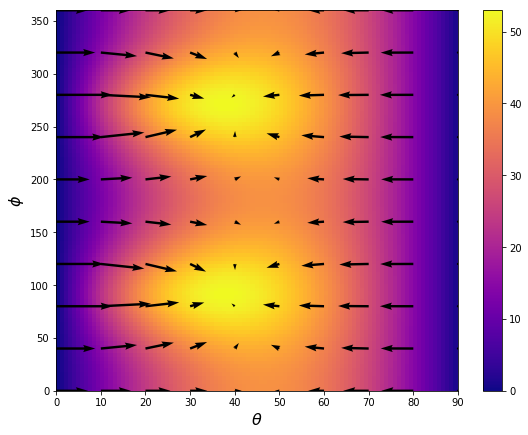

In [47]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('$\\theta$',fontsize=16)
plt.ylabel('$\phi$',fontsize=16)
plt.gcf().set_size_inches(9,7)

plt.savefig('12.25.svg')

plt.savefig('12.25.png')

<Figure size 504x504 with 0 Axes>

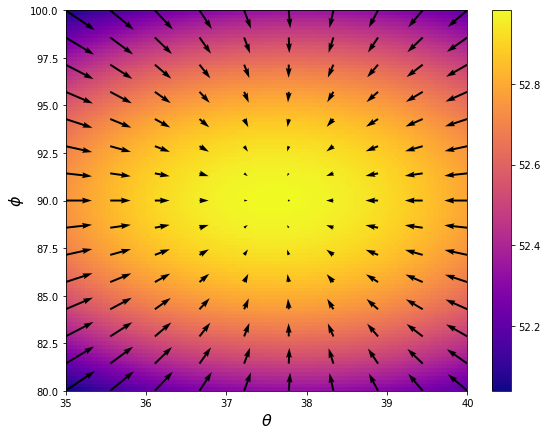

In [48]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('$\\theta$',fontsize=16)
plt.ylabel('$\phi$',fontsize=16)
plt.gcf().set_size_inches(9,7)
plt.savefig('12.26.svg')
plt.savefig('12.26.png')

## 4.4 Implementing gradient ascent

In [49]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [50]:
gradient_ascent(landing_distance,36,83)

(37.58114751557887, 89.99992616039857)

In [51]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [52]:
gradient_ascent_points(landing_distance,36,83)

([36,
  36.122600166772905,
  36.23613677117784,
  36.34128767809185,
  36.43867738707969,
  36.528881661579746,
  36.612431593208484,
  36.689817410269534,
  36.76149182796271,
  36.82787319253559,
  36.889348238189385,
  36.94627463082189,
  36.998983312818545,
  37.04778060625894,
  37.09295017401476,
  37.1347547357105,
  37.17343773749891,
  37.20922482998986,
  37.24232519341257,
  37.27293280238169,
  37.30122755921293,
  37.32737638815892,
  37.35153417332558,
  37.373844629087024,
  37.394441177605785,
  37.41344766648102,
  37.43097908994937,
  37.44714219995173,
  37.46203614206898,
  37.47575300263992,
  37.48837829193029,
  37.49999144506543,
  37.51066624835594,
  37.520471237201555,
  37.529470054915286,
  37.537721861285455,
  37.545281588371104,
  37.55220026024622,
  37.5585252985331,
  37.5643007355652,
  37.56956745597163,
  37.57436347378886,
  37.57872406035837,
  37.58268198235851,
  37.58626769365101,
  37.58950943120426,
  37.59243345312513,
  37.59506413458223

<Figure size 504x504 with 0 Axes>

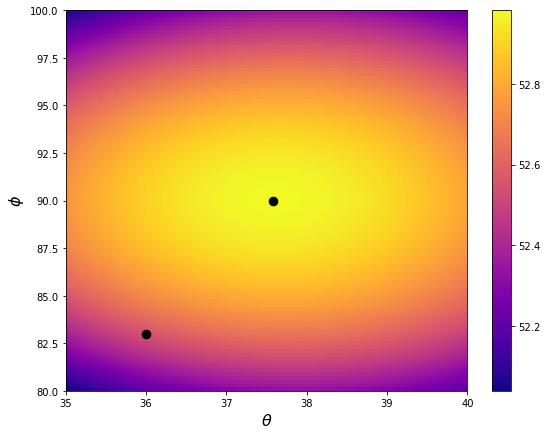

In [53]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
# plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('$\\theta$',fontsize=16)
plt.ylabel('$\phi$',fontsize=16)
plt.gcf().set_size_inches(9,7)
plt.savefig('12.27.svg')
plt.savefig('12.27.png')

<Figure size 504x504 with 0 Axes>

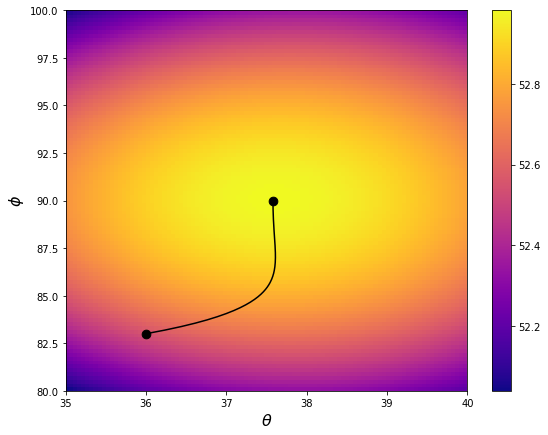

In [54]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('$\\theta$',fontsize=16)
plt.ylabel('$\phi$',fontsize=16)
plt.gcf().set_size_inches(9,7)
plt.savefig('12.28.svg')
plt.savefig('12.28.png')

In [55]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

## 4.5 Exercises

**Exercise:** On the heatmap, simultaneously plot the paths of gradient ascent from 20 randomly chosen points.  All of the paths should end up at one of the two maxima.

<Figure size 504x504 with 0 Axes>

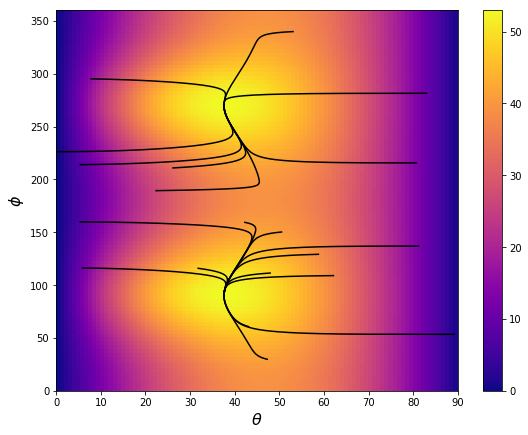

In [56]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('$\\theta$',fontsize=16)
plt.ylabel('$\phi$',fontsize=16)
gap = gradient_ascent_points(landing_distance,60,190,1000)

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)


plt.savefig('EXERCISE_12.13.svg')
plt.savefig('EXERCISE_12.13.png')

**Exercise:** Find the point on $r(\theta,\phi)$ where the gradient is zero but the function is not maximized.

In [57]:
gradient_ascent(landing_distance,0,180)

(46.122613357930206, 180.0)

**Exercise:** How many steps does it take for gradient ascent to reach the origin from (36,83)?  Instead of jumping one gradient, jump 1.5 gradients.  Show that you get there in fewer steps.  What happens if you jump even further in each step?

In [58]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += rate * grad[0]
        y += rate * grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [59]:
def count_ascent_steps(f,x,y,rate=1):
    gap = gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])

In [60]:
count_ascent_steps(landing_distance,36,83)

37.58114751557887 89.99992616039857


855

In [61]:
count_ascent_steps(landing_distance,36,83,rate=1.5)

37.58114755288237 89.99992556887184


568

In [62]:
count_ascent_steps(landing_distance,36,83,rate=3)

37.58114749426255 89.99992676791281


282

In [63]:
count_ascent_steps(landing_distance,36,83,rate=10)

37.58114748360439 89.99992495958149


81

In [64]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.58114744807723 89.99992670041118


38

<Figure size 504x504 with 0 Axes>

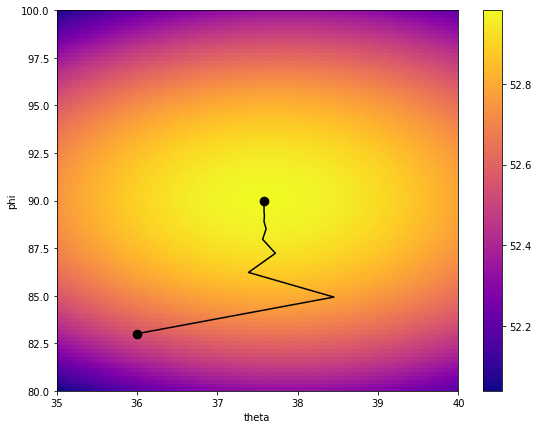

In [65]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=20),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

**Exercise:** What happens when you try to run gradient_ascent directly using simulated results for $r$  as a function of $\theta$ and $\phi$ instead of calculated results?

In [66]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

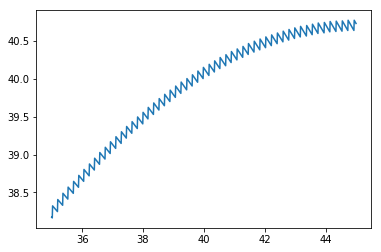

In [67]:
plot_function(simulated_distance_270,35,45)

# misc

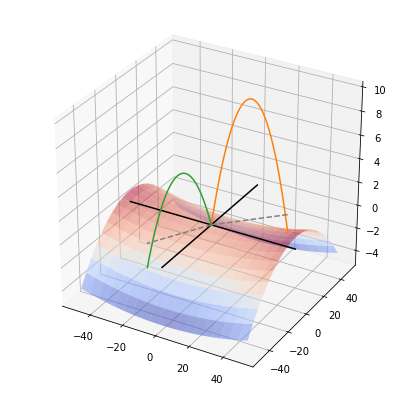

In [68]:
plot_trajectories_3d(
    trajectory3d(45,45,elevation=ridge),
    trajectory3d(30,-120,elevation=ridge),
    elevation=ridge, bounds=[-50,50,-50,50],shadows=True)
plt.savefig('12.04.svg')

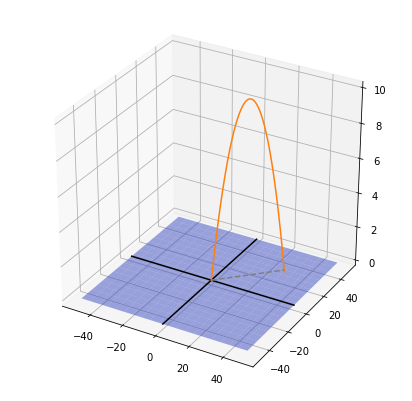

In [69]:
plot_trajectories_3d(
    trajectory3d(45,45,elevation=flat_ground),
#     trajectory3d(30,-120,elevation=ridge),
    elevation=flat_ground, bounds=[-50,50,-50,50],shadows=True)
plt.savefig('12.17.svg')

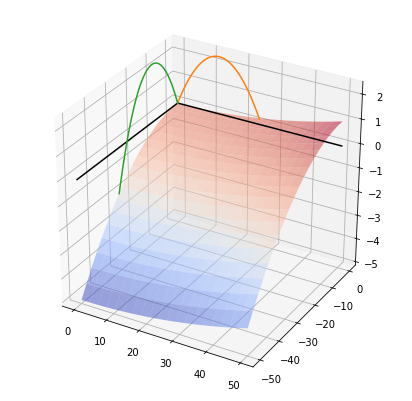

In [70]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,50,-50,0],
    elevation=ridge)
plt.savefig('12.18.svg')

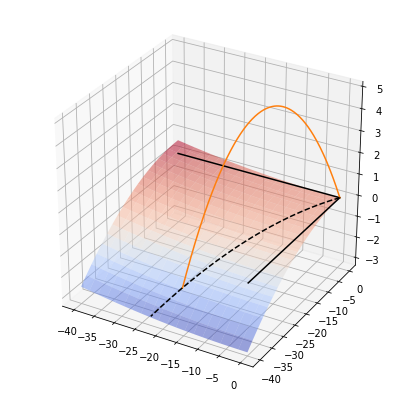

In [71]:
from math import tan
plot_trajectories_3d(
    trajectory3d(30,240,elevation=ridge),
    bounds=[-40,0,-40,0],
    elevation=ridge)

X = np.linspace(0,-23,20)
Y = tan(240 * pi / 180) * X

plt.plot(X,Y,[ridge(x,y) for (x,y) in zip(X,Y)],c='k',linestyle='dashed')
plt.savefig('12.19a.svg')

In [72]:
# def fig12_19():
#     def elevation_below(theta,phi,t):
#         return t**2 * (20**2) * cos(theta*pi/180)**2 * (B*cos(phi*pi/180)**2 - C*sin(phi*pi/180)**2)

#     def z(theta,phi,t):
#         return v*sin(theta*pi/180)*t + (g/2) * t**2

#     def v_xy(theta):
#         return v * sin

#     #     def altitude(t):
#     #         return a*t**2 + b*t

#     B = 0.001
#     C = 0.005
#     v = 20
#     g = -9.81

#     def velocity_components(v,theta,phi):
#         vx = v * cos(theta*pi/180) * cos(phi*pi/180)
#         vy = v * cos(theta*pi/180) * sin(phi*pi/180)
#         vz = v * sin(theta*pi/180)
#         return vx,vy,vz

#     def landing_distance(theta,phi):
#         vx, vy, vz = velocity_components(v, theta, phi)
#         v_xy = sqrt(vx**2 + vy**2)
#         a = (g/2) - B * vx**2 + C * vy**2
#         b = vz
#         landing_time = -b/a
#         landing_distance = v_xy * landing_time
#         return landing_distance

#     def draw_slice(theta,phi):
#         vx, vy, vz = velocity_components(v, theta, phi)
#         v_xy = sqrt(vx**2 + vy**2)
#         plot_function(lambda d: elevation_below(theta,phi,d/v_xy),0,50,c='k',linestyle='dashed')
#         #     plot_function(lambda d: alt(d/v_horiz),0,50)
#         plot_function(lambda d: 0, 0,50)

#         sim = trajectory3d(theta,phi,elevation=ridge)
#         plt.plot([sqrt(x**2+y**2) for x,y in zip(sim[1],sim[2])], sim[3])


#         landing = landing_distance(theta,phi)
#         landing_time = landing / v_xy
#         plt.scatter([landing], [elevation_below(theta,phi,landing_time)],c='k')


#     draw_slice(30,240)

# fig12_19()
